In [1]:
import numpy as np
import pandas as pd

import numpy as np
from pandas.tseries.offsets import BDay
import math
import random

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
from pyfinance import TSeries


In [3]:
from hurst import compute_Hc, random_walk

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from hurst import compute_Hc, random_walk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

In [10]:
# Load datasets

In [304]:
X_basic = pd.read_pickle('model_0_Xtest.pkl')
y_basic = pd.read_pickle('model_0_ytest.pkl')

In [16]:
X_roc5_1 = pd.read_pickle('model_1_Xtest.pkl')
y_roc5_1 = pd.read_pickle('model_1_ytest.pkl')

In [17]:
X_5h_2 = pd.read_pickle('model_2_Xtest.pkl')
y_5h_2 = pd.read_pickle('model_2_ytest.pkl')

In [19]:
# load ML modules

In [21]:
import pickle

In [22]:
filename = 'model_no0_basic.sav'
model_basic = pickle.load(open(filename, 'rb'))

In [23]:
filename = 'model_no1_roc_5.sav'
model_roc5_1 = pickle.load(open(filename, 'rb'))

In [24]:
filename = 'model_no2_5hour.sav'
model_5h_2 = pickle.load(open(filename, 'rb'))

In [25]:
#### Iteration accuracy prediction

In [29]:
# basic model

In [26]:
model_basic.score(X_basic, y_basic)

0.54304

In [27]:
y_pred = model_basic.predict(X_basic)

In [28]:
y_pred

array([-1., -1., -1., ...,  1., -1., -1.])

In [266]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_basic.sample(300)
    index_x = sampled_X.index
    
    score = model_basic.score(sampled_X, y_basic.loc[index_x,:])
    result_basic.append(score)

(array([ 1.,  0.,  0.,  2.,  1.,  2.,  4.,  6.,  5.,  9., 15., 14., 16.,
        15., 28., 25., 18., 27., 35., 41., 36., 43., 50., 45., 43., 41.,
        38., 44., 36., 41., 51., 37., 45., 30., 26., 25., 18., 22., 12.,
        10., 13.,  7.,  9.,  3.,  3.,  2.,  3.,  1.,  2.,  1.]),
 array([0.46      , 0.46326667, 0.46653333, 0.4698    , 0.47306667,
        0.47633333, 0.4796    , 0.48286667, 0.48613333, 0.4894    ,
        0.49266667, 0.49593333, 0.4992    , 0.50246667, 0.50573333,
        0.509     , 0.51226667, 0.51553333, 0.5188    , 0.52206667,
        0.52533333, 0.5286    , 0.53186667, 0.53513333, 0.5384    ,
        0.54166667, 0.54493333, 0.5482    , 0.55146667, 0.55473333,
        0.558     , 0.56126667, 0.56453333, 0.5678    , 0.57106667,
        0.57433333, 0.5776    , 0.58086667, 0.58413333, 0.5874    ,
        0.59066667, 0.59393333, 0.5972    , 0.60046667, 0.60373333,
        0.607     , 0.61026667, 0.61353333, 0.6168    , 0.62006667,
        0.62333333]),
 <a list of 50

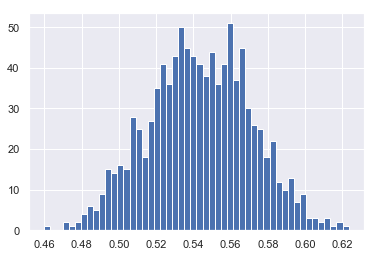

In [267]:
plt.hist(result_basic, bins=50)

In [268]:
np.median(result_basic)

0.5433333333333333

In [269]:
np.std(result_basic)

0.028065110020051822

In [270]:
np.percentile(result_basic, q=95)

0.59

In [42]:
### Roc5 model 1

In [261]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_roc5_1.sample(300)
    index_x = sampled_X.index
    
    score = model_roc5_1.score(sampled_X, y_roc5_1.loc[index_x,:])
    result_basic.append(score)

(array([ 1.,  1.,  0.,  2.,  2.,  3.,  2.,  5., 10.,  6., 15., 14., 14.,
        19., 28., 24., 35., 38., 45., 51., 52., 44., 55., 54.,  0., 62.,
        57., 49., 52., 45., 20., 43., 22., 32., 15., 20., 11., 13.,  9.,
         4., 12.,  5.,  5.,  4.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.67  , 0.6732, 0.6764, 0.6796, 0.6828, 0.686 , 0.6892, 0.6924,
        0.6956, 0.6988, 0.702 , 0.7052, 0.7084, 0.7116, 0.7148, 0.718 ,
        0.7212, 0.7244, 0.7276, 0.7308, 0.734 , 0.7372, 0.7404, 0.7436,
        0.7468, 0.75  , 0.7532, 0.7564, 0.7596, 0.7628, 0.766 , 0.7692,
        0.7724, 0.7756, 0.7788, 0.782 , 0.7852, 0.7884, 0.7916, 0.7948,
        0.798 , 0.8012, 0.8044, 0.8076, 0.8108, 0.814 , 0.8172, 0.8204,
        0.8236, 0.8268, 0.83  ]),
 <a list of 50 Patch objects>)

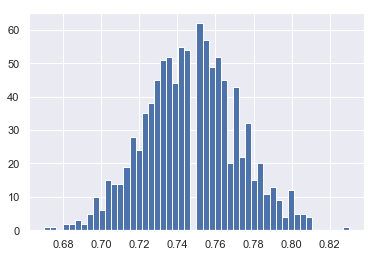

In [262]:
plt.hist(result_basic, bins=50)

In [263]:
np.mean(result_basic)

0.746963036963037

In [264]:
np.std(result_basic)

0.024605013109972828

In [271]:
np.percentile(result_basic, q=95)

0.59

In [80]:
### 5h candles model

In [256]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_5h_2.sample(100)
    index_x = sampled_X.index
    
    score = model_5h_2.score(sampled_X, y_5h_2.loc[index_x,:])
    result_basic.append(score)
    
    
    


(array([  1.,   0.,   0.,   0.,   6.,   0.,   5.,   0.,  18.,   0.,  26.,
          0.,  35.,   0.,  66.,   0.,  64.,   0.,  83.,   0.,  99.,   0.,
        114.,   0.,   0., 111.,   0., 108.,   0.,  86.,   0.,  62.,   0.,
         46.,   0.,  28.,   0.,  20.,   0.,  10.,   0.,   4.,   0.,   4.,
          0.,   3.,   0.,   1.,   0.,   1.]),
 array([0.49  , 0.4948, 0.4996, 0.5044, 0.5092, 0.514 , 0.5188, 0.5236,
        0.5284, 0.5332, 0.538 , 0.5428, 0.5476, 0.5524, 0.5572, 0.562 ,
        0.5668, 0.5716, 0.5764, 0.5812, 0.586 , 0.5908, 0.5956, 0.6004,
        0.6052, 0.61  , 0.6148, 0.6196, 0.6244, 0.6292, 0.634 , 0.6388,
        0.6436, 0.6484, 0.6532, 0.658 , 0.6628, 0.6676, 0.6724, 0.6772,
        0.682 , 0.6868, 0.6916, 0.6964, 0.7012, 0.706 , 0.7108, 0.7156,
        0.7204, 0.7252, 0.73  ]),
 <a list of 50 Patch objects>)

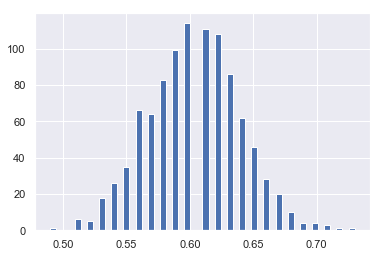

In [257]:
plt.hist(result_basic, bins=50)

In [258]:
np.var(result_basic)

0.001306582129159552

In [260]:
np.percentile(result_basic, q=95)

0.66

In [46]:
### random test


In [129]:
mu = 0.5
sigma =0.025
s = np.random.normal(mu, sigma, 1000)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  4.,  2.,  4.,  9.,
         5., 16., 17., 19., 23., 30., 39., 36., 47., 46., 71., 52., 51.,
        54., 59., 50., 51., 55., 43., 43., 35., 24., 30., 19., 14., 13.,
        10.,  4.,  7.,  3.,  5.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.40518585, 0.40879646, 0.41240707, 0.41601768, 0.41962829,
        0.4232389 , 0.42684951, 0.43046012, 0.43407073, 0.43768134,
        0.44129195, 0.44490256, 0.44851317, 0.45212377, 0.45573438,
        0.45934499, 0.4629556 , 0.46656621, 0.47017682, 0.47378743,
        0.47739804, 0.48100865, 0.48461926, 0.48822987, 0.49184048,
        0.49545109, 0.4990617 , 0.50267231, 0.50628292, 0.50989353,
        0.51350414, 0.51711475, 0.52072536, 0.52433597, 0.52794658,
        0.53155719, 0.53516779, 0.5387784 , 0.54238901, 0.54599962,
        0.54961023, 0.55322084, 0.55683145, 0.56044206, 0.56405267,
        0.56766328, 0.57127389, 0.5748845 , 0.57849511, 0.58210572,
        0.58571633]),
 <a list of 50

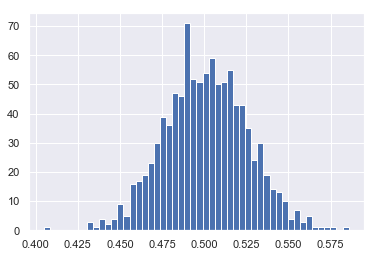

In [130]:
plt.hist(s,bins=50)

In [131]:
### Positive bias based on basic and roc5 model


In [146]:
# random accuracy variation 48-52%

In [251]:
# positive bias bench
result_basic = []
for i in range(0, 1001):
    sampled_X = X_basic.sample(300)
    index_x = sampled_X.index
    
    y_pred = np.ones(300)
    y_test = y_basic.loc[index_x,:]
    
    output = y_pred * y_test.shift_returns.values
    
    pos = output[output==1]
    neg = output[output==-1]
    
    score = len(neg) / (len(pos)+len(neg))
    result_basic.append(score)

(array([ 2.,  1.,  1.,  0.,  1.,  5.,  2.,  5.,  8.,  8.,  6.,  9., 15.,
        17., 18., 16., 24., 38., 50., 28., 42., 44., 29., 53., 48., 43.,
        48., 55., 45., 48., 38., 42., 32., 31., 23., 29., 23., 13.,  9.,
        11.,  8.,  7.,  5.,  7.,  3.,  2.,  3.,  1.,  2.,  3.]),
 array([0.42666667, 0.43006667, 0.43346667, 0.43686667, 0.44026667,
        0.44366667, 0.44706667, 0.45046667, 0.45386667, 0.45726667,
        0.46066667, 0.46406667, 0.46746667, 0.47086667, 0.47426667,
        0.47766667, 0.48106667, 0.48446667, 0.48786667, 0.49126667,
        0.49466667, 0.49806667, 0.50146667, 0.50486667, 0.50826667,
        0.51166667, 0.51506667, 0.51846667, 0.52186667, 0.52526667,
        0.52866667, 0.53206667, 0.53546667, 0.53886667, 0.54226667,
        0.54566667, 0.54906667, 0.55246667, 0.55586667, 0.55926667,
        0.56266667, 0.56606667, 0.56946667, 0.57286667, 0.57626667,
        0.57966667, 0.58306667, 0.58646667, 0.58986667, 0.59326667,
        0.59666667]),
 <a list of 50

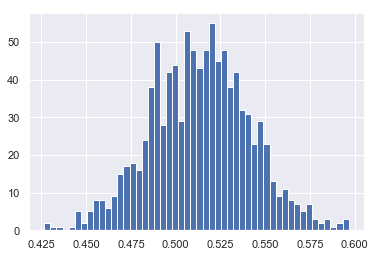

In [252]:
plt.hist(result_basic,bins=50)

In [253]:
np.median(result_basic)

0.5133333333333333

In [254]:
np.std(result_basic)

0.027455038783042278

In [255]:
np.percentile(result_basic, q=95)

0.56

In [185]:
# negative bias bench

In [239]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_5h_2.sample(100)
    index_x = sampled_X.index
    
    y_pred = np.ones(100)
    y_test = y_5h_2.loc[index_x,:]
    
    output = y_pred * y_test.shift_returns.values
    
    pos = output[output==1]
    neg = output[output==-1]
    
    score = len(neg) / (len(pos)+len(neg))
    result_basic.append(score)

(array([  1.,   0.,   1.,   0.,   5.,   0.,   8.,   0.,   0.,  22.,   0.,
         20.,   0.,  42.,   0.,  57.,   0.,   0.,  72.,   0.,  84.,   0.,
         99.,   0.,   0., 118.,   0., 102.,   0., 101.,   0.,  84.,   0.,
          0.,  69.,   0.,  51.,   0.,  24.,   0.,  18.,   0.,   0.,  14.,
          0.,   5.,   0.,   3.,   0.,   1.]),
 array([0.42  , 0.4244, 0.4288, 0.4332, 0.4376, 0.442 , 0.4464, 0.4508,
        0.4552, 0.4596, 0.464 , 0.4684, 0.4728, 0.4772, 0.4816, 0.486 ,
        0.4904, 0.4948, 0.4992, 0.5036, 0.508 , 0.5124, 0.5168, 0.5212,
        0.5256, 0.53  , 0.5344, 0.5388, 0.5432, 0.5476, 0.552 , 0.5564,
        0.5608, 0.5652, 0.5696, 0.574 , 0.5784, 0.5828, 0.5872, 0.5916,
        0.596 , 0.6004, 0.6048, 0.6092, 0.6136, 0.618 , 0.6224, 0.6268,
        0.6312, 0.6356, 0.64  ]),
 <a list of 50 Patch objects>)

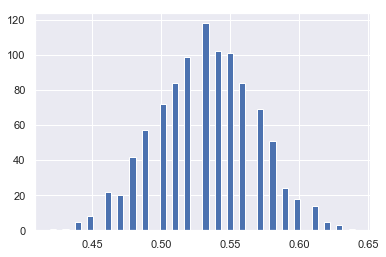

In [240]:
plt.hist(result_basic,bins=50)

In [241]:
np.mean(result_basic)

0.5322977022977023

In [242]:
np.median(result_basic)

0.53

In [243]:
np.std(result_basic)

0.036088957755017546

In [244]:
np.max(result_basic)

0.64

In [245]:
np.percentile(result_basic, q=95)

0.59

In [272]:
#### load regime prediction

In [415]:
filename = 'regime_model_basic_8.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [416]:
loaded_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1000, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [398]:
X_basic

,price,volume,range,adj_close,volume_sma_5,volume_sma_20,volume_sma_50,volume_sma_500,volume_roc,volume_roc_5,...,ROC_200,ROC_500,abs_returns,hurst_1000,hurst_120,hurst_500,momersion_50,momersion_100,momersion_500,momersion_1000
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-07 01:00:00,11516.00,5440879.08,0.934253,1.000826,1.089191e+07,1.065376e+07,8.507763e+06,4.848149e+06,0.231139,0.570719,...,0.021232,0.020413,0.000481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 02:00:00,11636.00,4001636.83,1.259227,1.004186,7.137345e+06,9.083717e+06,8.311329e+06,4.849802e+06,-0.264524,-0.824293,...,0.022101,0.021787,0.001109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 03:00:00,11628.00,2815426.66,0.683096,1.002025,4.841523e+06,8.382685e+06,8.012976e+06,4.844969e+06,-0.296431,-0.803042,...,0.022338,0.021374,0.000073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 04:00:00,11691.00,3937698.04,1.154699,1.002396,4.123006e+06,8.320476e+06,7.782691e+06,4.845477e+06,0.398615,-0.477085,...,0.022426,0.022664,0.000577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 05:00:00,11609.00,2953716.49,1.278066,0.996139,3.829871e+06,8.335636e+06,7.598285e+06,4.842193e+06,-0.249888,-0.331646,...,0.021893,0.022789,0.000751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 06:00:00,11610.00,1541956.07,0.734532,0.999613,3.050087e+06,6.367415e+06,7.546515e+06,4.827499e+06,-0.477961,-0.716598,...,0.021708,0.023563,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 07:00:00,11533.02,2490226.00,0.945770,0.995986,2.747805e+06,5.965791e+06,7.540722e+06,4.795638e+06,0.614979,-0.377698,...,0.021091,0.025271,0.000711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 08:00:00,11560.00,3687762.64,0.990065,1.002445,2.922272e+06,5.427643e+06,7.513493e+06,4.777150e+06,0.480895,0.309841,...,0.021152,0.021754,0.000250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 09:00:00,11629.00,1475621.96,1.226404,1.004530,2.429857e+06,5.085554e+06,7.059783e+06,4.755678e+06,-0.599860,-0.625258,...,0.022517,0.021794,0.000636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
X_basic[['hurst_1000']] = X_basic[['price']].rolling(1000).apply(hurstF4, raw=False).pct_change(50)
X_basic[['hurst_120']] = X_basic[['price']].rolling(120).apply(hurstF4, raw=False).pct_change(50)
X_basic[['hurst_500']] = X_basic[['price']].rolling(500).apply(hurstF4, raw=False).pct_change(50)


X_basic[['momersion_50']] = X_basic[['returns']].rolling(50).apply(Momersion, raw=False).pct_change(50)
X_basic[['momersion_100']] = X_basic[['returns']].rolling(100).apply(Momersion, raw=False).pct_change(50)
X_basic[['momersion_500']] = X_basic[['returns']].rolling(500).apply(Momersion, raw=False).pct_change(50)
X_basic[['momersion_1000']] = X_basic[['returns']].rolling(500).apply(Momersion, raw=False).pct_change(50)



In [417]:
y_pred = loaded_model.predict(X_basic.drop(columns=['price', 'hurst']).fillna(0).replace([np.inf, -np.inf], 0))

In [418]:
trading_df = X_basic.copy()

In [419]:
trading_df['entry'] = y_pred

In [420]:
df = trading_df[trading_df.entry==1]

In [421]:
trade_direction = model_basic.predict(df.fillna(0).drop(columns=['hurst_1000', 'hurst_120', 'hurst_500', 'momersion_50', 'momersion_100', 'momersion_500', 'momersion_1000', 'entry']))

In [422]:
trade_direction.cumsum()

array([ -1.,  -2.,  -3., ..., 602., 601., 600.])

In [423]:
trading_df[trading_df.entry==1].shape

(2780, 36)

In [424]:
trading_df.shape

(3125, 36)

In [425]:
2780/3125

0.8896